In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import time
sb.set()

In [2]:
def load_data(path, header=None):
    data_df = pd.read_csv(path, header)
    return data_df

[[ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]
 [ 1.         45.08327748 56.31637178]
 [ 1.         61.10666454 96.51142588]
 [ 1.         75.02474557 46.55401354]
 [ 1.         76.0987867  87.42056972]
 [ 1.         84.43281996 43.53339331]
 [ 1.         95.86155507 38.22527806]]


D:\Program Files\Miniconda3\envs\venv\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  


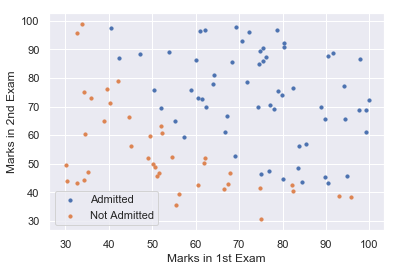

In [3]:
data_df = load_data('data/marks.txt', )
# Collect all the feature values from dataset except the last column
X = data_df.iloc[:, :-1]
# Collect the target values (the last column values)
y = data_df.iloc[:, -1]
# Add 1 new columns whose feature values are always == 1.0 (for multiplying with theta0 later)
#X['Intercept'] = 1.0
X = np.c_[np.ones((X.shape[0], 1)), X]
print(X[0:10])
# Filter out the applicants who are admitted
admitted = data_df.loc[y == 1]
# Filter out the applicants who are not admitted
not_admitted = data_df.loc[y == 0]
# plots
plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=10, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=10, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

## Define hypothesis function & cost function

### Hypothesis function

Using logistic regression function ($h\sigma{(x)}$) to classify either a student is able to be admitted or not

### <center>$h(x) = \sigma (\theta^{T} x) = \frac{1}{1+e^{-\theta^{T} x}}$</center>

### <center> $\implies h(x)= 
\begin{cases}
    > 0.5, & \text{if } \theta^{T}x > 0\\
    < 0.5, & \text{if } \theta^{T}x < 0
\end{cases}$</center>

where <center> $\theta=
\begin{bmatrix} 
\theta_0 \\
\theta_1 \\
\theta_2 \\
\vdots \\
\theta_n
\end{bmatrix}\quad$ and $\quad x = \begin{bmatrix} 
1.0 \\
x_1 \\
x_2 \\
\vdots \\
x_{n-1}
\end{bmatrix}$ </center>

### Cost function

Like linear regression, we must define a cost function in order to penalize our model if the predicted values are far removed from the target values.<br> Therefore, we might be able to minimize that cost function to make better prediction.

In this case, the cost value of a single training example can be calculated as follows:

### <center>$cost = 
\begin{cases}
    -log(h(x)), & \text{if } y = 1\\
    -log(1-h(x)), &\text{if } y = 0
\end{cases}
$</center>

### Intuition behind cost function

If the ground truth label is 1 and the function h(x) predicts wrongly (e.g h(x) ~ 0) -> -log(h(x)) ~ +inf (the penalty is extremely high) and vice versa.

The picture below shows the penalty value computed by the cost function

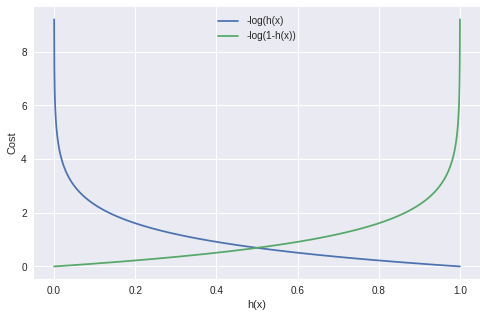

### Generalize cost function

The equation above can be expressed by Combining 2 conditions into a singular equation as follows:

### <center>$cost(x,y) = -\space[\space ylog(h(x)) + (1-y)log(1-h(x))]\space\space$ (*)</center>

Based on the equation (*), we can derive the more general form of cost function for computing cost values of all observations as shown below:

### <center>$J(\theta) = -\frac{1}{N}\sum_{i=1}^{N}y_{i}log(h(x_{i})) + (1-y_{i})log(1-h(x_{i}))$</center>

### <center>$\leftrightarrow\space = -\frac{1}{N}\sum_{i=1}^{N}y_{i}log(\frac{1}{1+e^{-\theta^{T}x_{i}}}) + (1-y_{i})log(1-\frac{1}{1+e^{-\theta^{T}x_{i}}})\space$(**)</center>

#### Simplyfication steps for equation (**) before jumping into the optimization steps:

#### 1. <font size="4">$\space log(\frac{1}{1+e^{-\theta^{T}}})$</font> can also be expressed as:

#### <font size="4">$\leftrightarrow\ log(1) - log(1+e^{-\theta^{T}x_{i}}) = -log(1+e^{-\theta^{T}x_{i}})\quad$ (1)</font>

#### 2.  <font size="4">$\space log(1 - \frac{1}{1+e^{-\theta^{T}x_{i}}})$</font> can also be expressed as:

<font size="4">$\leftrightarrow\ log(\frac{1+e^{-\theta^{T}x_{i}}}{1+e^{-\theta^{T}x_{i}}} - \frac{1}{1+e^{-\theta^{T}x_{i}}})) = log(\frac{e^{-\theta^{T}x_{i}}}{1+e^{-\theta^{T}x_{i}}}) = log({e^{-\theta^{T}x_{i}}}) - log(1 + e^{-\theta^{T}x_{i}})$</font>

#### <font size="4">$\leftrightarrow -\theta^{T}x_{i} - log(1+e^{-\theta^{T}x_{i}})\quad$  (2)</font>

#### The following equation holds when substituting (1) & (2) into (**):

### <center>$\leftrightarrow\space = -\frac{1}{N}\sum_{i=1}^{N}-y_{i}log(1+e^{-\theta^{T}x_{i}}) - (1-y_{i})(\theta^{T}x_{i} + log(1+e^{-\theta^{T}x_{i}}))$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N}y_{i}log(1+e^{-\theta^{T}x_{i}}) + (1-y_{i})(\theta^{T}x_{i} + log(1+e^{-\theta^{T}x_{i}}))\space$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} y_{i}log(1+e^{-\theta^{T}x_{i}}) - y_{i}log(1+e^{-\theta^{T}x_{i}}) + log(1+e^{-\theta^{T}x_{i}}) + \theta^{T}x_{i} - y_{i}\theta^{T}x_{i} \space$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} log(1+e^{-\theta^{T}x_{i}}) + \theta^{T}x_{i} - y_{i}\theta^{T}x_{i} \space$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} log(1+e^{-\theta^{T}x_{i}}) + log(e^{\theta^{T}x_{i}}) - y_{i}\theta^{T}x_{i} \space$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} log(e^{\theta^{T}x_{i}}(1+e^{-\theta^{T}x_{i}})) - y_{i}\theta^{T}x_{i} \space$</center>

### <center>$\rightarrow\space J(\theta)= \frac{1}{N}\sum_{i=1}^{N} log(1+e^{\theta^{T}x_{i}}) - y_{i}\theta^{T}x_{i} \space$ (***)</center>

## Optimization steps by applying Gradient Descent:

### 1. Take the 1st order derivative of equation (***) w.r.t  $\theta_{j}$:

### <center> $\frac{\partial J}{\partial \theta_j} = \frac{\partial}{\partial \theta_j}log(1+e^{\theta^{T}x_i}) -\frac{\partial}{\partial \theta_j}y_i\theta^{T}x_i $ </center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} \frac{x^{j}_{i}e^{\theta^{T}x_{i}}}{1 + e^{\theta^T x_i}} - y_{i}x^j_{i} \space$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} x^{j}_{i}h(x_i) - y_{i}x^j_{i} \space$</center>

### <center>$\leftrightarrow\space = \frac{1}{N}\sum_{i=1}^{N} (h(x_i) - y_{i})x^j_{i} \quad (vector form)$</center>

### <center>$\longrightarrow\space = X^{T}(h(X) - Y) \quad (matrix form)$</center>

### <center>$\leftrightarrow\space = \begin{bmatrix}
\frac{\sum_{i=1}^{N} (h(x_{0, i})-y_{0, i})x_{0, i}}{N}\\
\frac{\sum_{i=1}^{N} (h(x_{1, i})-y_{1, i})x_{1, i}}{N}\\
\vdots\\
\frac{\sum_{i=1}^{N} (h(x_{D, i})-y_{D, i})x_{D, i}}{N}
\end{bmatrix}_{(D+1)x1}$</center>
where D is the number of dimensions (features) in the dataset

-> Identical to the 1st order derivative of cost function for linear regression & only inside h(x) is different

### 2. Update the weight of the parameters as follows:

### <center>$\theta_{new} = \theta_{old} - \eta\frac{\partial J}{\partial \theta_j}$</center>
where $\eta$ is the user-defined learning rate or step size

Continue this procedure till the cost function's value meets the certain threshold

In [4]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def input_values(X, theta): 
    # Compute the weighted sum of inputs
    # x is NxD & theta is Dx1
    return np.dot(X, theta)

def probability(X, theta):
    # Compute the probability of N observations by taking weighted inputs as the input
    # And return Nx1 matrix 
    return sigmoid(input_values(X, theta))

def cost_function(X, y, theta):
    return -(1 / X.shape[0]) * np.sum(y * np.log(probability(X, theta)) + (1 - y) * np.log(1 - probability(X, theta)))

def gradient(X, y, theta, batch_size):
    # Return the gradient matrix with D gradient components 
    #-> X.T(DxN) dot [prob(X, theta) - Y] (Nx1) = Dx1 matrix
    return (1 / batch_size) * np.dot(X.T, (probability(X, theta) - y))

In [5]:
def accuracy(X, target, theta, prob_threshold=0.5):
    # Compute the probability for the observation belongs to class 1
    # If predicted probability >= prob_threshold -> class 1. Otherwise, class 0
    predicted_target = (probability(X, theta) >= prob_threshold).astype(int)
    accuracy = np.mean(predicted_target == target)
    return accuracy * 100

In [6]:
def batch_gradient(X, y, theta, eta, err_threshold=1.5e-1, max_iteration=200000):
    iteration = 0
    sample_size = X.shape[0]
    # Create cost_store & theta_store vars to keep track of the result for each iteration
    cost_store = np.zeros((max_iteration + 1, 2))
    #theta_store = np.zeros((theta.shape[0], max_iteration))
    cost = 9999
    cost_function(X, y, theta)
    start_time = time.time()
    while True:
        # Each element of cost_store keep a value
        cost = cost_function(X, y, theta)
        cost_store[iteration][0] = iteration
        cost_store[iteration][1] = cost
        if iteration % 1000 == 0:
            print('----------------------')
            print(f'Iteration: {iteration}')
            print(f'Cost: {cost}')
        # Each element of theta_store hold a sequence of values
        #theta_store[:, iteration] = theta.flatten()
        if cost <= err_threshold or iteration >= max_iteration:
            break
        # Perform optimization
        #for x, target in zip(X.values, y):
        theta = theta - eta * gradient(X, y, theta, sample_size)
        iteration += 1
        
    end_time = time.time()
    print('Time execution for Batch Gradient Descent: {}'.format(end_time-start_time))
    return theta, cost_store

In [7]:
y = y[:, np.newaxis] # Transform (N, ) matrix into (N, 1) matrix

In [8]:
no_iter = 100000
eta = 1e-3
theta_1 = np.zeros((X.shape[1], 1)) # Create (D, 1) theta matrix
costs_1 = np.zeros((no_iter + 1, 2))
theta_1, costs_1 = batch_gradient(X, y, theta_1, eta, max_iteration=no_iter)

----------------------
Iteration: 0
Cost: 0.6931471805599454
----------------------
Iteration: 1000
Cost: 0.6219144943536291
----------------------
Iteration: 2000
Cost: 0.6171964224146217
----------------------
Iteration: 3000
Cost: 0.6125588009058098
----------------------
Iteration: 4000
Cost: 0.6080002782657942
----------------------
Iteration: 5000
Cost: 0.6035195091666608
----------------------
Iteration: 6000
Cost: 0.5991151556273828
----------------------
Iteration: 7000
Cost: 0.594785888063984
----------------------
Iteration: 8000
Cost: 0.5905303862767055
----------------------
Iteration: 9000
Cost: 0.5863473403746832
----------------------
Iteration: 10000
Cost: 0.5822354516388756
----------------------
Iteration: 11000
Cost: 0.5781934333242051
----------------------
Iteration: 12000
Cost: 0.5742200114020687
----------------------
Iteration: 13000
Cost: 0.5703139252445433
----------------------
Iteration: 14000
Cost: 0.5664739282517731
----------------------
Iteration: 15000

In [9]:
accuracy(X, y, theta_1)

89.8989898989899

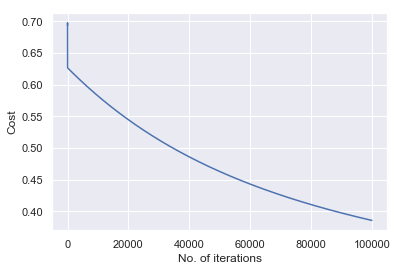

In [10]:
plt.plot(costs_1[:, 0], costs_1[:, 1])
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

## Optimization steps by applying Newton's method:

### Concept

Newton's method is used to find the root of the equation (a.k.a f(x) = 0) by using this formula: <br><br>
<center><font size="4">$x_{t+1} = x_t - \frac{f(x_t)}{f'(x_t)}$<font/></center>

Hence, in order to find the root of the 1st derivative of equation (a.k.a f'(x) = 0) or to search for the optimum point of equation f(x), the derivation of the above equation can be expressed by, <br><br>
<center><font size="4">$x_{t+1} = x_t - \frac{f'(x_t)}{f''(x_t)}$<font/></center>

By replacing $\space \theta_t = x_{t}$, Newton's method can be applied to find the optimal parameters for this logistic regression, <br><br>
<center><font size="4">$\theta_{n+1} = \theta_{n} - H_{J(\theta_n)}^{-1}\nabla J(\theta_n)$<font/></center>
where <br>$\quad\quad J(\theta_n)$ is the cost function of logistic regression <br>
    $\quad\quad H_{J({\theta_n})}$ is the Hessian matrix which is derived from the 2nd derivative of $\nabla J(\theta_n)$

Knowing that<br><br> 
<center>
    <font size="4">
        $\frac{\partial J}{\partial\theta_j} = \frac{1}{N}\sum_{i=1}^{N} (h(x_i) - y_{i})x^j_{i}$ <br><br>
        $\leftrightarrow\space \frac{1}{N}\sum_{i=1}^{N} (\sigma(\theta^Tx_i) - y_{i})x^j_{i}$ <br><br>
        $\rightarrow\quad \frac{\partial J^2}{\partial\theta_i \theta_j} = \frac{\partial( \sigma(\theta^Tx)x)}{\partial\theta_j}$<br><br>
        $\leftrightarrow\space = \space\sigma(\theta^Tx)(1 - \sigma(\theta^Tx))x\frac{\partial(\theta^Tx)}{\partial\theta_j}$<br><br>
        $\leftrightarrow\space = \space\sigma(\theta^Tx)(1 - \sigma(\theta^Tx))xx^T$<br><br>
        $\leftrightarrow\space H_{J(\theta_n)} = \space\frac{1}{N}\sum_{i=1}^{N}\sigma(\theta^Tx_i)(1 - \sigma(\theta^Tx_i))x_ix^T_i\quad$ (vector form)<br><br>
        $\leftrightarrow\space H_{J(\theta_n)} = \space \frac{1}{N}X^TRX\quad$ (matrix form)<br><br>
    </font>
</center>
where <br>
$\quad\quad R$ is the diagonal matrix with entries $R_{i, i} = \sigma(\theta^Tx_i)(1-\sigma(\theta^Tx_i))$

In [11]:
def hessian(X, theta):
    R = np.eye(X.shape[0], X.shape[0])
    i = 0
    for entry in X[:]:
        R[i, i] = probability(entry, theta)
        i += 1
    return np.dot(X.T, np.dot(R, X))

def newton_method(X, y, theta, tol=5e-7, max_iteration=10000):
    iteration = 0
    delta_theta = np.Infinity
    curr_theta = np.empty((X.shape[1], 1))
    cost_store = np.zeros((max_iteration + 1, 2))
    start_time = time.time()
    while True:
        curr_theta = theta.copy()
        cost = cost_function(X, y, theta)
        cost_store[iteration][0] = iteration
        cost_store[iteration][1] = cost
        if iteration % 100 == 0:
            print(f'Iteration: {iteration}')
            print(f'Cost: {cost}')
        H_inv = np.linalg.inv(hessian(X, theta))
        grad_J = gradient(X, y, theta, X.shape[0])
        theta -= np.dot(H_inv, grad_J)
        delta_theta = np.abs(curr_theta - theta)
        if np.any(delta_theta <= tol) or iteration >= max_iteration:
            end_time = time.time()
            print('Time execution for Newton\'s method: {}'.format(end_time-start_time))
            return curr_theta, cost_store
        iteration += 1

In [12]:
theta_2 = np.zeros((X.shape[1], 1))

In [13]:
theta_2, costs_2 = newton_method(X, y, theta_2)

Iteration: 0
Cost: 0.6931471805599454
Iteration: 100
Cost: 0.5015222623842472
Iteration: 200
Cost: 0.4200104455126428
Iteration: 300
Cost: 0.3762261940821418
Iteration: 400
Cost: 0.34870900429033924
Iteration: 500
Cost: 0.3294250249558863
Iteration: 600
Cost: 0.3149211088517233
Iteration: 700
Cost: 0.3034960161608965
Iteration: 800
Cost: 0.2942034261095789
Iteration: 900
Cost: 0.28646496508190006
Iteration: 1000
Cost: 0.2799019797911479
Iteration: 1100
Cost: 0.2742537590006858
Iteration: 1200
Cost: 0.2693337986334322
Iteration: 1300
Cost: 0.26500458363568546
Iteration: 1400
Cost: 0.26116217904268124
Iteration: 1500
Cost: 0.2577263796156738
Iteration: 1600
Cost: 0.2546341806247439
Iteration: 1700
Cost: 0.2518353185355021
Iteration: 1800
Cost: 0.2492891471192147
Iteration: 1900
Cost: 0.24696240051350493
Iteration: 2000
Cost: 0.24482756025886185
Iteration: 2100
Cost: 0.24286164269339244
Iteration: 2200
Cost: 0.24104528462386815
Iteration: 2300
Cost: 0.23936204434081312
Iteration: 2400
Cos

In [14]:
accuracy(X, y, theta_2)

89.8989898989899

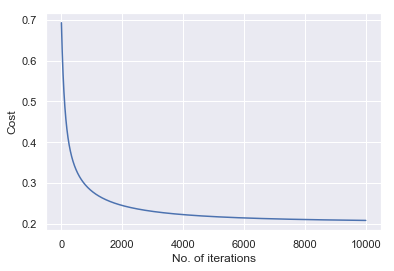

In [15]:
plt.plot(costs_2[:, 0], costs_2[:, 1])
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.show()

It seems that the execution time for Newton's method is slower compared to Gradient Descent -> the complexity of computation is higher. However, the cost reduces way more than Gradient Descent's method when applying Newton's method for solving this problem.

## Regularization

<font size="3.5">Purpose: </font><br><br>By applying regularization or adding the penalty for weights to the cost function, the model will have less accuracy on training data but it is more robust and less over-fit when it comes to predict the testing data -> achieve higher accuracy on testing data due to the regularized term tries to reduce the sensitivity of the model's parameters. <br><br>
Another reason worth mentioning is that regularization can be also helps the model work properly without over-fitting when the training samples less than the data features. (e.g. the number of dimensions of a dataset is 1000 but the number of samples is only 600 -> if using least square method only, this case can't even form a single hyperplane)

### Formula of cost function after applying Ridge Regression (L2 regularization):

### <center> $J(\theta) = -\frac{1}{N}\sum_{i=1}^{N}y_{i}log(\frac{1}{1+e^{-\theta^{T}x_{i}}}) + (1-y_{i})log(1-\frac{1}{1+e^{-\theta^{T}x_{i}}}) + \frac{\lambda}{2}\sum_{k=1}^{D}w_k^2$ </center>

where $\lambda$ is a scalar which can be chosen by k-fold cross validation <br>
      $\quad\quad w$ is the component of $\theta$

The reason why k starts from 1 to D is because the regularization term doesn't take $w_0$ or intercept parameter into account

### <center> $\rightarrow \frac{\partial J}{\partial \theta_j} = \frac{1}{N}\sum_{i=1}^{N} (h(x_i) - y_{i})x^j_{i} + \lambda\sum_{k=1}^{D}w_k$ </center>

### <center> $\rightarrow H_{J(\theta_n)} = \frac{1}{N}\sum_{i=1}^{N} h(x_i)(1 - h(x_i))x_ix_i^T + \lambda I_{DxD}$ </center>

In [16]:
def regularized_newton_method(X, y, theta, lmbda=0.1, tol=5e-7, max_iteration=10000):
    iteration = 0
    delta_theta = np.Infinity
    curr_theta = np.empty((X.shape[1], 1))
    cost_store = np.zeros((max_iteration + 1, 2))
    start_time = time.time()
    while True:
        curr_theta = theta.copy()
        cost = cost_function(X, y, theta)
        cost_store[iteration][0] = iteration
        cost_store[iteration][1] = cost
        if iteration % 100 == 0:
            print(f'Iteration: {iteration}')
            print(f'Cost: {cost}')
        H_reg = hessian(X, theta) + (lmbda * np.eye(theta.shape[0])) # Hessian matrix including regularized term
        H_inv_reg = np.linalg.inv(H_reg)
        grad_J_reg = gradient(X, y, theta, X.shape[0]) + (lmbda * np.sum(theta)) # Gradient vector including regularized term
        theta -= np.dot(H_inv_reg, grad_J_reg)
        delta_theta = np.abs(curr_theta - theta)
        if np.any(delta_theta <= tol) or iteration >= max_iteration:
            end_time = time.time()
            print('Time execution for Regularized Newton\'s method: {}'.format(end_time-start_time))
            return curr_theta, cost_store
        iteration += 1

In [17]:
theta_3 = np.zeros((X.shape[1], 1))
lmbda = 0.001

In [18]:
theta_3, costs_3 = regularized_newton_method(X, y, theta_3, lmbda)

Iteration: 0
Cost: 0.6931471805599454
Iteration: 100
Cost: 0.5044092706716481
Iteration: 200
Cost: 0.4263041779492107
Iteration: 300
Cost: 0.384932971678122
Iteration: 400
Cost: 0.3592647779899911
Iteration: 500
Cost: 0.341610928220102
Iteration: 600
Cost: 0.32863812450817625
Iteration: 700
Cost: 0.3186683580071728
Iteration: 800
Cost: 0.3107546894154921
Iteration: 900
Cost: 0.3043173292551593
Iteration: 1000
Cost: 0.298979501953115
Iteration: 1100
Cost: 0.2944848470373785
Iteration: 1200
Cost: 0.29065233609868524
Iteration: 1300
Cost: 0.2873501305601095
Iteration: 1400
Cost: 0.2844796852018091
Iteration: 1500
Cost: 0.2819656935599299
Iteration: 1600
Cost: 0.2797495087315279
Iteration: 1700
Cost: 0.2777847077690143
Iteration: 1800
Cost: 0.2760340209486744
Iteration: 1900
Cost: 0.2744671552531291
Iteration: 2000
Cost: 0.2730592190219824
Iteration: 2100
Cost: 0.27178956030473045
Iteration: 2200
Cost: 0.2706408959744991
Iteration: 2300
Cost: 0.2695986491170865
Iteration: 2400
Cost: 0.2686

In [19]:
accuracy(X, y, theta_3)

90.9090909090909

As can be seen from the result after running regularized Newton's method, the accuracy of the regularized model is higher compared to the others w/o regularization, and the training time is also much more faster due to fewer iterations are needed to execute

## Decision Boundary

As there are 2 features in this dataset, the linear equation can be represented by,
<br><br>
<center><font size="4"> $f(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$</font></center>
<br>
The boundary between 2 classes can be found by setting, <br><br>
<center><font size="4"> $h(x) = 0.5 \space\leftrightarrow\space \theta_0 + \theta_1x_1 + \theta_2x_2 = 0$<br><br>
</font></center>

#### <center><font size="4">$\rightarrow x_2 = -\frac{\theta_0 + \theta_1x_1}{\theta_2}\quad $ (3)</font></center>

We will use equation (3) to sketch on top of the plot we used to visualize our data from the beginning.

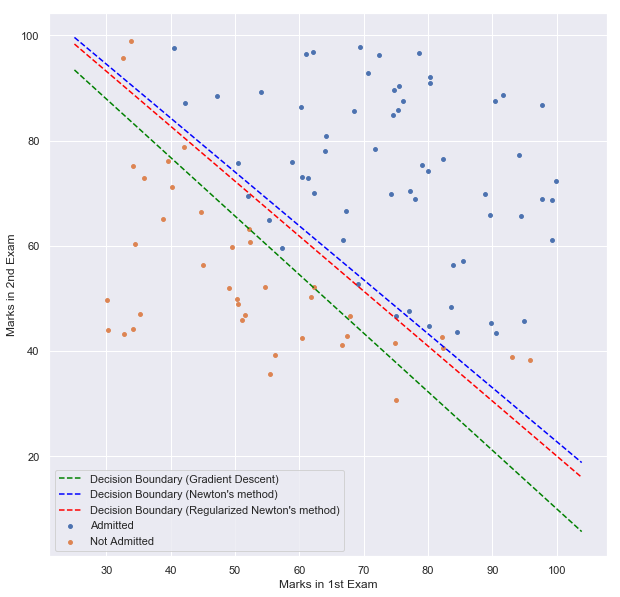

In [20]:
x_values = [np.min(X[:, 1] - 5), np.max(X[:, 2] + 5)]
y_val_1 = - (theta_1[0, 0] + np.dot(theta_1[1, 0], x_values)) / theta_1[2, 0]
y_val_2 = - (theta_2[0, 0] + np.dot(theta_2[1, 0], x_values)) / theta_2[2, 0]
y_val_3 = - (theta_3[0, 0] + np.dot(theta_3[1, 0], x_values)) / theta_3[2, 0]

fig= plt.figure(figsize=(10,10))

plt.plot(x_values, y_val_1, label='Decision Boundary (Gradient Descent)', ls='--', color='green')
plt.plot(x_values, y_val_2, label='Decision Boundary (Newton\'s method)', ls='--', color='blue')
plt.plot(x_values, y_val_3, label='Decision Boundary (Regularized Newton\'s method)', ls='--', color='red')

plt.scatter(admitted.iloc[:, 0], admitted.iloc[:, 1], s=15, label='Admitted')
plt.scatter(not_admitted.iloc[:, 0], not_admitted.iloc[:, 1], s=15, label='Not Admitted')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()

### Scikit-learn implementation

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [22]:
model = LogisticRegression()
model.fit(X, y)
predicted_classes = model.predict(X)
accuracy_sk = accuracy_score(y.flatten(),predicted_classes)
parameters = model.coef_

D:\Program Files\Miniconda3\envs\venv\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Program Files\Miniconda3\envs\venv\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print('Accuracy: {}, Parameters: {}'.format(accuracy_sk, parameters))

Accuracy: 0.9090909090909091, Parameters: [[-2.83211951  0.05064637  0.0463309 ]]
